## Get and prepare Data

In [234]:
import numpy as np
import pandas as pd

In [235]:
df_data = pd.read_csv('airline-passengers.csv')
df_data.head(7)

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
5,1949-06,135
6,1949-07,148


In [236]:
df_data.shape

(144, 2)

In [237]:
df_passenger= df_data['Passengers']

In [238]:
# transform univariate time series to supervised learning problem
from numpy import array
# split a univariate sequence into samples
def split_sequence(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
    # find the end of this pattern
        end_ix = i + n_steps
    # check if we are beyond the sequence
        if end_ix > len(sequence)-1:
            break
    # gather input and output parts of the pattern
        # print(i, end_ix)
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)

## tuning data

In [239]:
n_steps = 6
X, y = split_sequence(df_passenger, n_steps)

In [240]:
print(X.shape, y.shape)

(135, 9) (135,)


In [241]:
n_steps = 6
X, y = split_sequence(df_passenger, n_steps)  # column names to X and y data frames
df_X = pd.DataFrame(X, columns=['t-' + str(i) for i in range(n_steps-1, -1, -1)])
df_y = pd.DataFrame(y, columns=['t+1 (prediction)'])

# concat df_X and df_y
df = pd.concat([df_X, df_y], axis=1)

In [242]:
print(X.shape, y.shape)

(135, 9) (135,)


In [244]:
# df_X.head()
# df_y.head()
df.head(5)

,t-8,t-7,t-6,t-5,t-4,t-3,t-2,t-1,t-0,t+1 (prediction)
0,112,118,132,129,121,135,148,148,136,119
1,118,132,129,121,135,148,148,136,119,104
2,132,129,121,135,148,148,136,119,104,118
3,129,121,135,148,148,136,119,104,118,115
4,121,135,148,148,136,119,104,118,115,126


## Plotting

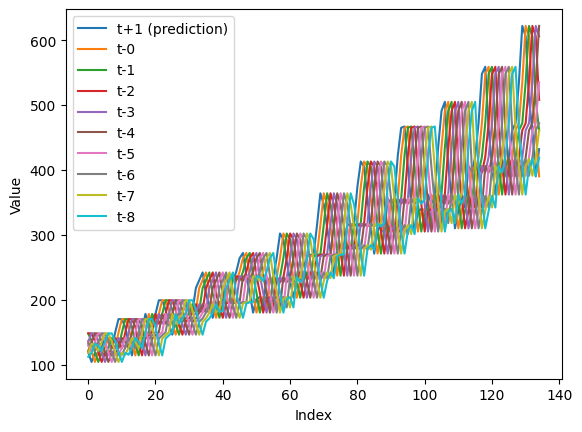

In [245]:
import matplotlib.pyplot as plt

# Plotting
plt.plot(df.index, df['t+1 (prediction)'], label='t+1 (prediction)')
for i in range(n_steps):
    plt.plot(df.index, df['t-' + str(i)], label='t-' + str(i))
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()
plt.show()

## Preprocessing

In [246]:
from sklearn.preprocessing import MinMaxScaler
scaler= MinMaxScaler()
X_norm= scaler.fit_transform(df_X)
# y_norm= scaler.fit_transform(df_y)

In [247]:
X_norm

array([[0.01758242, 0.03076923, 0.06153846, ..., 0.08494208, 0.08494208,
        0.06177606],
       [0.03076923, 0.06153846, 0.05494505, ..., 0.08494208, 0.06177606,
        0.02895753],
       [0.06153846, 0.05494505, 0.03736264, ..., 0.06177606, 0.02895753,
        0.        ],
       ...,
       [0.68791209, 0.63076923, 0.69230769, ..., 1.        , 0.96911197,
        0.77992278],
       [0.63076923, 0.69230769, 0.78461538, ..., 0.96911197, 0.77992278,
        0.68918919],
       [0.69230769, 0.78461538, 0.80879121, ..., 0.77992278, 0.68918919,
        0.55212355]])

## Split Data

In [248]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.2, random_state=0)

## model knn


In [249]:
# import knn
from sklearn.neighbors import KNeighborsRegressor
model_knn = KNeighborsRegressor(n_neighbors=7)

## fit and predict knn

In [250]:
model_knn.fit(X_train, y_train)
y_pred=model_knn.predict(X_test)

## mse

$$ \text{MSE} = \frac{1}{n} \sum_{i=0}^n (y_i - \hat{y}_i)^2$$ 

In [251]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)

1038.4737082761776

## result

In [252]:
y_test.shape

(27,)

In [253]:
y_pred.shape

(27,)

## MAPE

In [254]:
from sklearn.metrics import mean_absolute_percentage_error

mean_absolute_percentage_error(y_test, y_pred)

0.10889474724118099

In [255]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(y_test, y_pred)

28.592592592592602

## Naive Bayes Model

In [256]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error


# Create a Naive Bayes classifier
naive_bayes = GaussianNB()

In [257]:
# Training the model
naive_bayes.fit(X_train, y_train)

# Making predictions on the test set
y_pred = naive_bayes.predict(X_test)

In [258]:
# Calculating MSE and MAPE
mse = mean_squared_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Percentage Error (MAPE):", mape)

Mean Squared Error (MSE): 3271.6666666666665
Mean Absolute Percentage Error (MAPE): 0.16521824859099984
